In [7]:
import pandas as pd

data = pd.read_csv(r'C:\Users\Samul\Downloads\archive\olympic_results.csv')
print(data.head())
print(data.info())

if 'medal_type' in data.columns:
    
    print(data['medal_type'].isna().sum())

    medal_data = data.dropna(subset=['medal_type'])

    medal_counts = medal_data.groupby('country_3_letter_code').size().sort_values(ascending=False)

    print("Eniten mitaleja voittaneet maat:")
    print(medal_counts.head())
else:
    print("medal_type-saraketta ei löydy datasta.")


  discipline_title    event_title     slug_game participant_type medal_type  \
0          Curling  Mixed Doubles  beijing-2022         GameTeam       GOLD   
1          Curling  Mixed Doubles  beijing-2022         GameTeam     SILVER   
2          Curling  Mixed Doubles  beijing-2022         GameTeam     BRONZE   
3          Curling  Mixed Doubles  beijing-2022         GameTeam        NaN   
4          Curling  Mixed Doubles  beijing-2022         GameTeam        NaN   

                                            athletes rank_equal rank_position  \
0  [('Stefania CONSTANTINI', 'https://olympics.co...      False             1   
1  [('Kristin SKASLIEN', 'https://olympics.com/en...      False             2   
2  [('Almida DE VAL', 'https://olympics.com/en/at...      False             3   
3  [('Jennifer DODDS', 'https://olympics.com/en/a...      False             4   
4  [('Rachel HOMAN', 'https://olympics.com/en/ath...      False             5   

    country_name country_code country_

In [10]:
medal_counts_by_type = medal_data.groupby(['country_3_letter_code', 'medal_type']).size().unstack(fill_value=0)

print("Mitalit maittain ja tyypeittäin:")
print(medal_counts_by_type)

print("\nEniten kultamitaleja voittaneet maat:")
print(medal_counts_by_type['GOLD'].sort_values(ascending=False).head())


Mitalit maittain ja tyypeittäin:
medal_type             BRONZE  GOLD  SILVER
country_3_letter_code                      
AFG                         2     0       0
AHO                         0     0       1
ALG                         8     5       4
ANZ                         5     3       4
ARG                        30    21      26
...                       ...   ...     ...
VIE                         0     1       3
WIF                         2     0       0
YUG                        29    26      32
ZAM                         1     0       1
ZIM                         1     3       4

[154 rows x 3 columns]

Eniten kultamitaleja voittaneet maat:
country_3_letter_code
USA    1171
URS     473
GER     337
GBR     294
CHN     284
Name: GOLD, dtype: int64


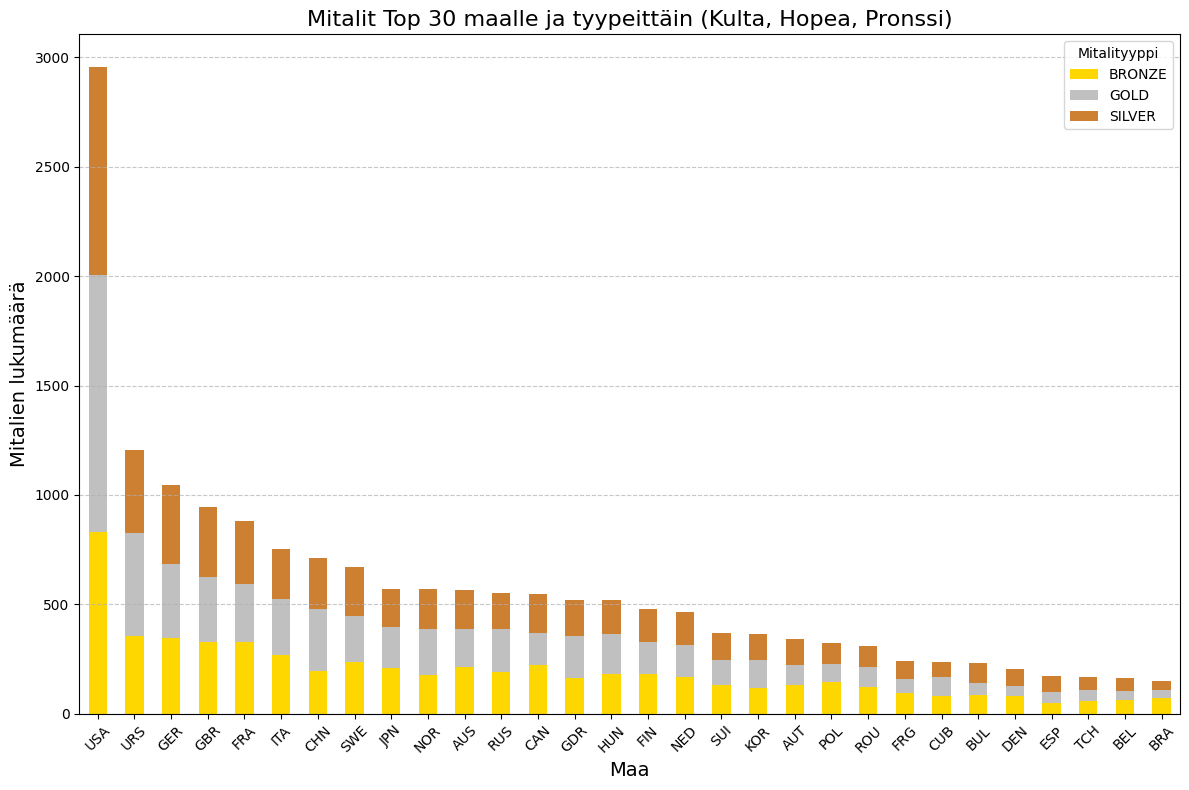

In [ ]:
import matplotlib.pyplot as plt

top_countries = medal_counts_by_type.sum(axis=1).sort_values(ascending=False).head(30)

filtered_data = medal_counts_by_type.loc[top_countries.index]

filtered_data.plot(kind='bar', stacked=True, figsize=(12, 8), color=['gold', 'silver', '#cd7f32'])

plt.title('Mitalit Top 30 maalle ja tyypeittäin (Kulta, Hopea, Pronssi)', fontsize=16)
plt.xlabel('Maa', fontsize=14)
plt.ylabel('Mitalien lukumäärä', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Mitalityyppi')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

data = pd.read_csv('C:/Users/Samul/Downloads/archive/olympic_results.csv')

print(data.head())

print(data.columns)


  discipline_title    event_title     slug_game participant_type medal_type  \
0          Curling  Mixed Doubles  beijing-2022         GameTeam       GOLD   
1          Curling  Mixed Doubles  beijing-2022         GameTeam     SILVER   
2          Curling  Mixed Doubles  beijing-2022         GameTeam     BRONZE   
3          Curling  Mixed Doubles  beijing-2022         GameTeam        NaN   
4          Curling  Mixed Doubles  beijing-2022         GameTeam        NaN   

                                            athletes rank_equal rank_position  \
0  [('Stefania CONSTANTINI', 'https://olympics.co...      False             1   
1  [('Kristin SKASLIEN', 'https://olympics.com/en...      False             2   
2  [('Almida DE VAL', 'https://olympics.com/en/at...      False             3   
3  [('Jennifer DODDS', 'https://olympics.com/en/a...      False             4   
4  [('Rachel HOMAN', 'https://olympics.com/en/ath...      False             5   

    country_name country_code country_

In [ ]:
import pandas as pd

data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_hosts.csv')

modern_olympics = data[data['game_year'] >= 1896]

print(modern_olympics)

                      game_slug         game_end_date       game_start_date  \
0                  beijing-2022  2022-02-20T12:00:00Z  2022-02-04T15:00:00Z   
1                    tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z   
2              pyeongchang-2018  2018-02-25T08:00:00Z  2018-02-08T23:00:00Z   
3                      rio-2016  2016-08-21T21:00:00Z  2016-08-05T12:00:00Z   
4                    sochi-2014  2014-02-23T16:00:00Z  2014-02-07T04:00:00Z   
5                   london-2012  2012-08-12T19:00:00Z  2012-07-27T07:00:00Z   
6                vancouver-2010  2010-02-28T04:00:00Z  2010-02-12T16:00:00Z   
7                  beijing-2008  2008-08-24T12:00:00Z  2008-08-08T00:00:00Z   
8                    turin-2006  2006-02-26T19:00:00Z  2006-02-10T07:00:00Z   
9                   athens-2004  2004-08-29T18:00:00Z  2004-08-13T06:00:00Z   
10          salt-lake-city-2002  2002-02-24T08:00:00Z  2002-02-08T15:00:00Z   
11                  sydney-2000  2000-10-01T09:00:00

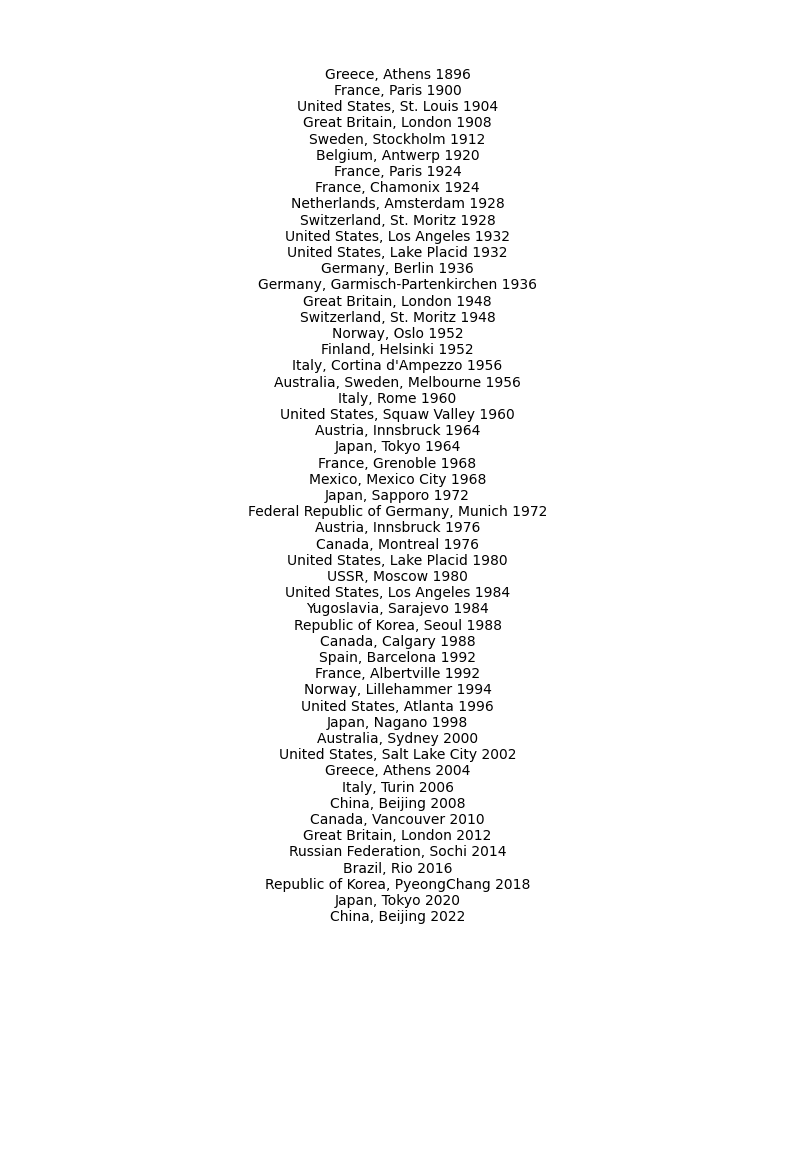

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_hosts.csv')

modern_olympics = data[data['game_year'] >= 1896]

modern_olympics['host'] = modern_olympics['game_location'] + ', ' + modern_olympics['game_name']

modern_olympics = modern_olympics.sort_values(by='game_year')

host_list = modern_olympics['host'].tolist()

plt.figure(figsize=(10, 15))

plt.text(0.5, 0.95, '\n'.join(host_list), ha='center', va='top', fontsize=10, wrap=True)

plt.axis('off')  
plt.show()





In [ ]:
import pandas as pd

data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_results.csv')

print(data.head())



  discipline_title    event_title     slug_game participant_type medal_type  \
0          Curling  Mixed Doubles  beijing-2022         GameTeam       GOLD   
1          Curling  Mixed Doubles  beijing-2022         GameTeam     SILVER   
2          Curling  Mixed Doubles  beijing-2022         GameTeam     BRONZE   
3          Curling  Mixed Doubles  beijing-2022         GameTeam        NaN   
4          Curling  Mixed Doubles  beijing-2022         GameTeam        NaN   

                                            athletes rank_equal rank_position  \
0  [('Stefania CONSTANTINI', 'https://olympics.co...      False             1   
1  [('Kristin SKASLIEN', 'https://olympics.com/en...      False             2   
2  [('Almida DE VAL', 'https://olympics.com/en/at...      False             3   
3  [('Jennifer DODDS', 'https://olympics.com/en/a...      False             4   
4  [('Rachel HOMAN', 'https://olympics.com/en/ath...      False             5   

    country_name country_code country_

In [ ]:
import pandas as pd

data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_results.csv')

print(data.columns)

if 'medal_type' in data.columns and 'athlete_name' in data.columns:
    
    medal_counts = data.groupby('athlete_name')['medal_type'].count()

    top_medalists = medal_counts.sort_values(ascending=False).head(10)

    print("Eniten mitaleja voittaneet urheilijat:")
    print(top_medalists)
else:
    print("Tarvittavia sarakkeita ei löydy: 'medal_type' tai 'athlete_name'.")


Index(['discipline_title', 'event_title', 'slug_game', 'participant_type',
       'medal_type', 'athletes', 'rank_equal', 'rank_position', 'country_name',
       'country_code', 'country_3_letter_code', 'athlete_url',
       'athlete_full_name', 'value_unit', 'value_type'],
      dtype='object')
Tarvittavia sarakkeita ei löydy: 'medal_type' tai 'athlete_name'.


In [ ]:
import pandas as pd

data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_results.csv')

print(data.columns)

if 'medal_type' in data.columns and 'athlete_full_name' in data.columns:
    
    medal_data = data.dropna(subset=['medal_type'])
    
    medal_data = medal_data[medal_data['medal_type'].isin(['GOLD', 'SILVER', 'BRONZE'])]
    
    phelps_data = medal_data[medal_data['athlete_full_name'] == 'Michael PHELPS']
    print("Michael Phelpsin mitalit:")
    print(phelps_data)

    medal_data = medal_data.drop_duplicates(subset=['athlete_full_name', 'medal_type', 'event_title'])

    medal_counts = medal_data.groupby('athlete_full_name')['medal_type'].count()

    top_medalists = medal_counts.sort_values(ascending=False).head(10)

    print("Eniten mitaleja voittaneet urheilijat:")
    print(top_medalists)
else:
    print("Tarvittavia sarakkeita ei löydy: 'medal_type' tai 'athlete_full_name'.")


Index(['discipline_title', 'event_title', 'slug_game', 'participant_type',
       'medal_type', 'athletes', 'rank_equal', 'rank_position', 'country_name',
       'country_code', 'country_3_letter_code', 'athlete_url',
       'athlete_full_name', 'value_unit', 'value_type'],
      dtype='object')
Michael Phelpsin mitalit:
      discipline_title                 event_title     slug_game  \
20512         Swimming  200m individual medley men      rio-2016   
20861         Swimming          200m butterfly men      rio-2016   
21272         Swimming          100m butterfly men      rio-2016   
25737         Swimming          100m butterfly men   london-2012   
26273         Swimming  200m individual medley men   london-2012   
26645         Swimming          200m butterfly men   london-2012   
42289         Swimming  200m individual medley men  beijing-2008   
42564         Swimming          100m butterfly men  beijing-2008   
43189         Swimming          200m butterfly men  beijing-2008 

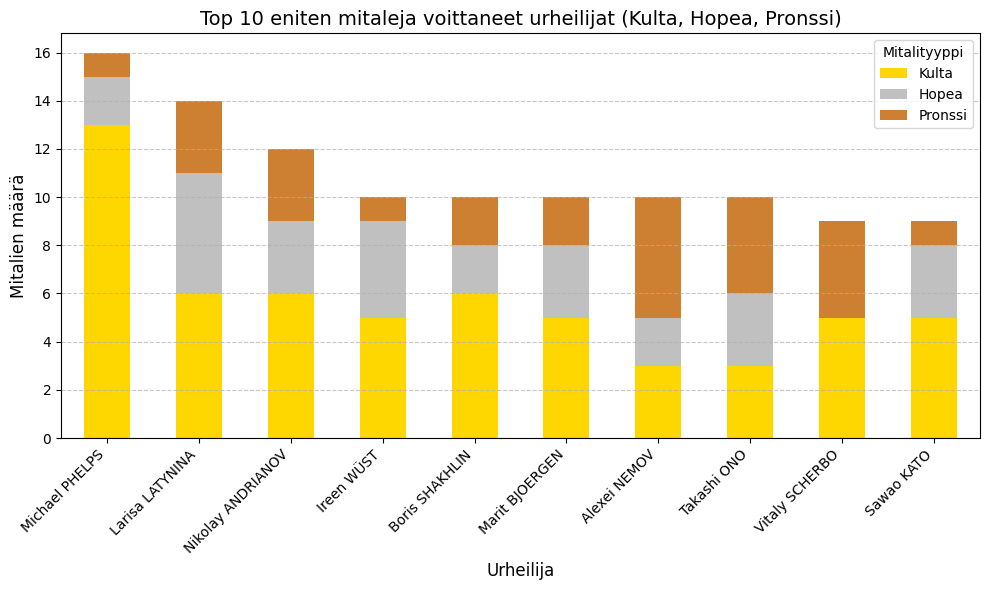

Top 10 eniten mitaleja voittaneet urheilijat:
medal_type         GOLD  SILVER  BRONZE
athlete_full_name                      
Michael PHELPS       13       2       1
Larisa LATYNINA       6       5       3
Nikolay ANDRIANOV     6       3       3
Ireen WÜST            5       4       1
Boris SHAKHLIN        6       2       2
Marit BJOERGEN        5       3       2
Alexei NEMOV          3       2       5
Takashi ONO           3       3       4
Vitaly SCHERBO        5       0       4
Sawao KATO            5       3       1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_results.csv')

data_clean = data.dropna(subset=['medal_type'])

athlete_medals = data_clean.groupby(['athlete_full_name', 'medal_type']).size().unstack(fill_value=0)

athlete_medals = athlete_medals[['GOLD', 'SILVER', 'BRONZE']]  

top_athletes = athlete_medals.sum(axis=1).sort_values(ascending=False).head(10)

top_athletes_medals = athlete_medals.loc[top_athletes.index]

top_athletes_medals.plot(kind='bar', stacked=True, figsize=(10, 6), color=['gold', 'silver', '#cd7f32'])

plt.title('Top 10 eniten mitaleja voittaneet urheilijat (Kulta, Hopea, Pronssi)', fontsize=14)
plt.xlabel('Urheilija', fontsize=12)
plt.ylabel('Mitalien määrä', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Mitalityyppi', labels=['Kulta', 'Hopea', 'Pronssi'])
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

print("Top 10 eniten mitaleja voittaneet urheilijat:")
print(top_athletes_medals)


In [8]:
import pandas as pd

athletes_data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_athletes.csv')
print(athletes_data.columns)


Index(['athlete_url', 'athlete_full_name', 'games_participations',
       'first_game', 'athlete_year_birth', 'athlete_medals', 'bio'],
      dtype='object')


In [ ]:
import pandas as pd

athletes_data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_athletes.csv')

athletes_clean = athletes_data.dropna(subset=['first_game'])

athletes_clean['year'] = athletes_clean['first_game'].str.extract(r'(\d{4})').astype(int)

athlete_counts_per_year = (
    athletes_clean.groupby('year')['athlete_full_name']
    .nunique()
    .reset_index(name='athlete_count') 
    .sort_values(by='year')  
)

print("Urheilijamäärät per vuosi:")
print(athlete_counts_per_year)

athlete_counts_per_year.to_csv('athlete_counts_per_year.csv', index=False)


Urheilijamäärät per vuosi:
    year  athlete_count
0   1896            111
1   1900            345
2   1904            344
3   1908            749
4   1912            831
5   1920            835
6   1924           1047
7   1928            814
8   1932            686
9   1936           1730
10  1948           1893
11  1952           2067
12  1956           1448
13  1960           2351
14  1964           2282
15  1968           2607
16  1972           2881
17  1976           2688
18  1980           2340
19  1984           3855
20  1988           4373
21  1992           4840
22  1994            561
23  1996           3848
24  1998            833
25  2000           3738
26  2002            926
27  2004           3631
28  2006           1002
29  2008           3932
30  2010           1023
31  2012           3903
32  2014           1157
33  2016           4105
34  2018           1075
35  2020           3831
36  2022           1134


C:\Users\Samul\AppData\Local\Temp\ipykernel_7984\527178352.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athletes_clean['year'] = athletes_clean['first_game'].str.extract(r'(\d{4})').astype(int)


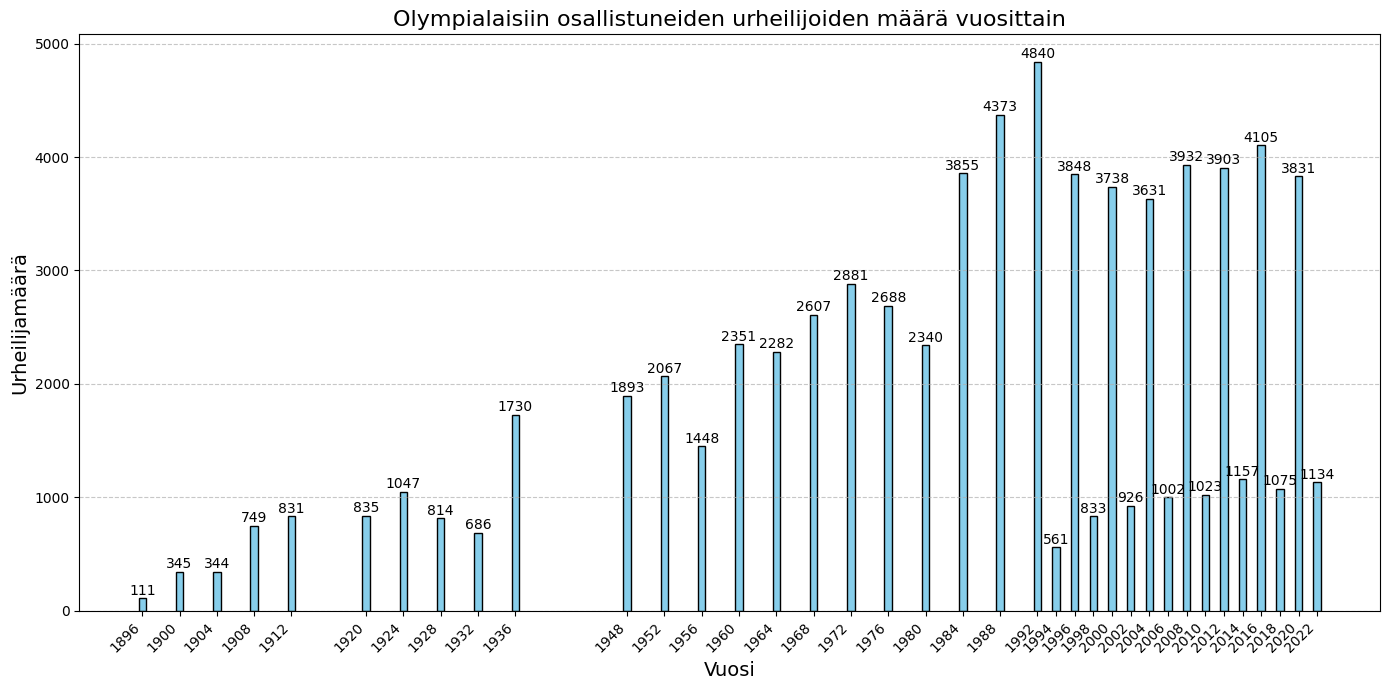

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

bars = plt.bar(
    athlete_counts_per_year['year'],
    athlete_counts_per_year['athlete_count'],
    color='skyblue', edgecolor='black'
)

for bar, count in zip(bars, athlete_counts_per_year['athlete_count']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 5,  
        str(count),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.xticks(
    ticks=athlete_counts_per_year['year'],
    labels=athlete_counts_per_year['year'],
    rotation=45,
    ha='right'
)

plt.title('Olympialaisiin osallistuneiden urheilijoiden määrä vuosittain', fontsize=16)
plt.xlabel('Vuosi', fontsize=14)
plt.ylabel('Urheilijamäärä', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


In [ ]:
import numpy as np

athlete_counts = athlete_counts_per_year['athlete_count']

median_athletes = np.median(athlete_counts)

print(f"Urheilijamäärien mediaani on: {median_athletes}")


Urheilijamäärien mediaani on: 1730.0


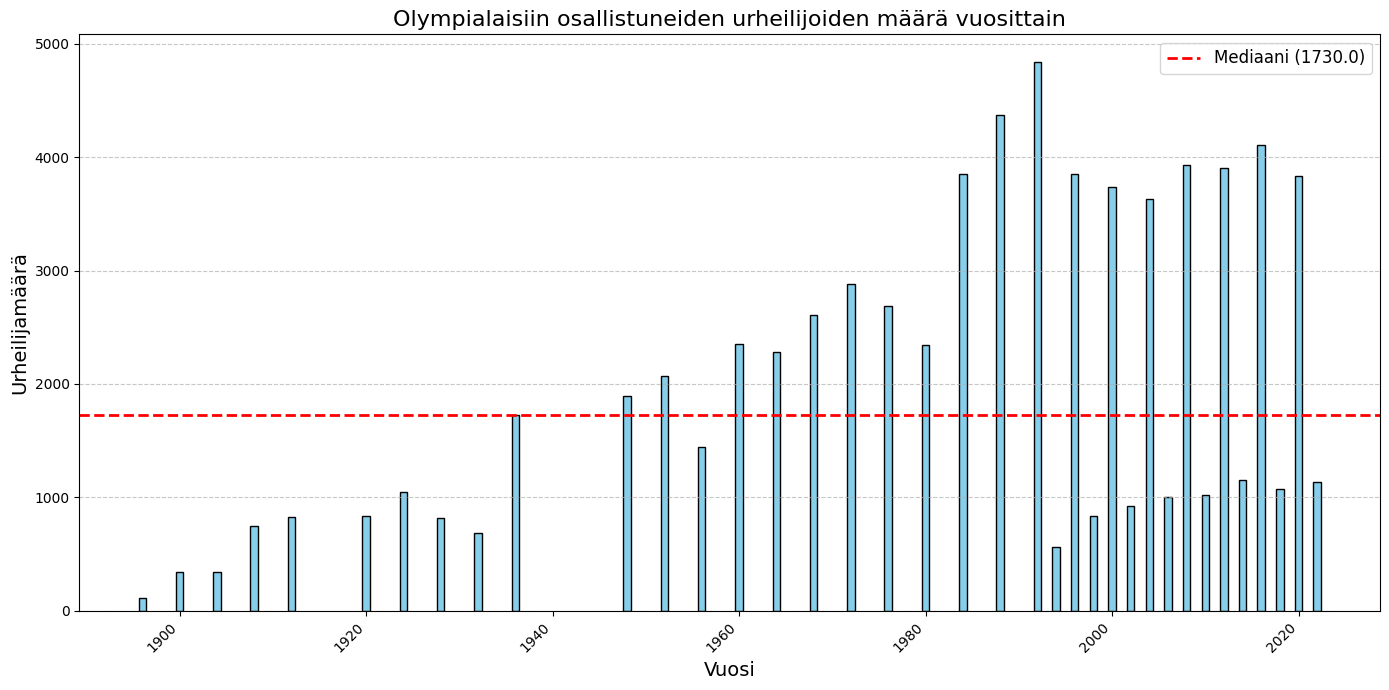

In [ ]:
plt.figure(figsize=(14, 7))
bars = plt.bar(
    athlete_counts_per_year['year'],
    athlete_counts_per_year['athlete_count'],
    color='skyblue', edgecolor='black'
)

plt.axhline(y=median_athletes, color='red', linestyle='--', linewidth=2, label=f'Mediaani ({median_athletes})')

plt.legend(fontsize=12)
plt.title('Olympialaisiin osallistuneiden urheilijoiden määrä vuosittain', fontsize=16)
plt.xlabel('Vuosi', fontsize=14)
plt.ylabel('Urheilijamäärä', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

athlete_counts = athlete_counts_per_year['athlete_count']

mean_athletes = np.mean(athlete_counts)

print(f"Urheilijoiden keskiarvo on: {mean_athletes}")


Urheilijamäärien keskiarvo on: 2049.0810810810813


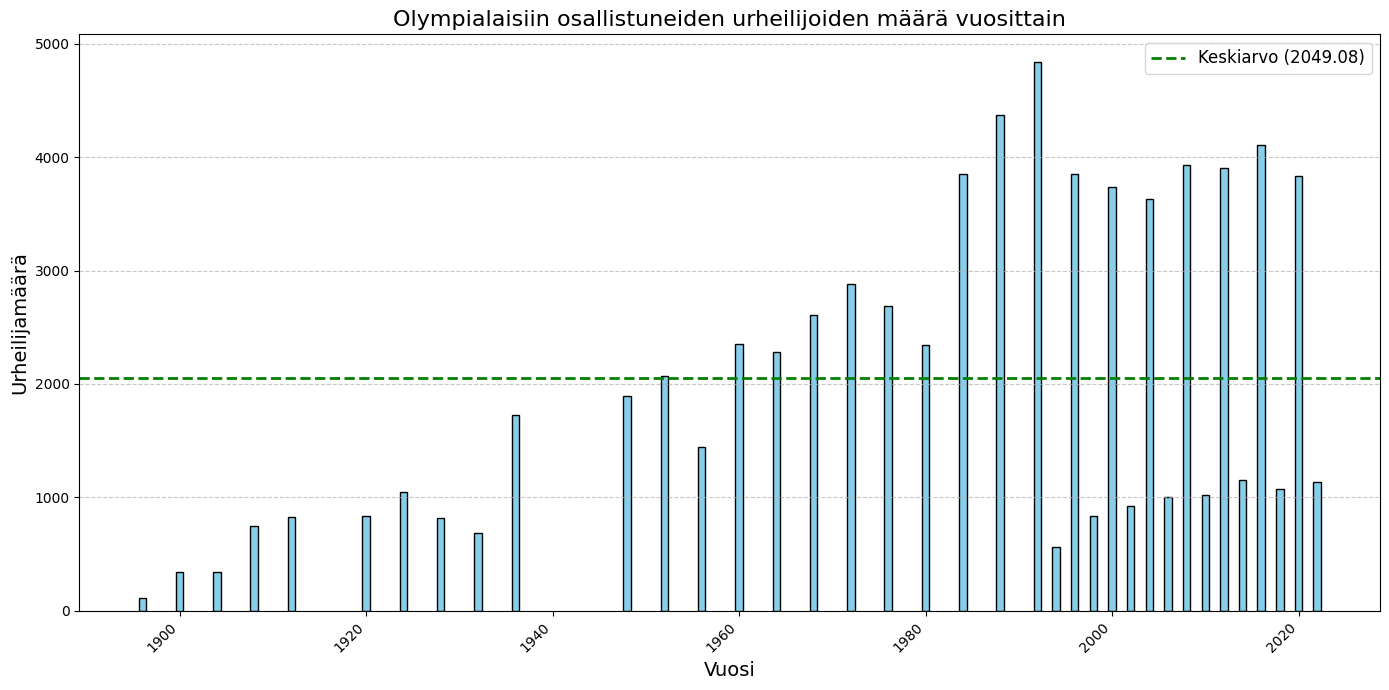

In [ ]:
plt.figure(figsize=(14, 7))
bars = plt.bar(
    athlete_counts_per_year['year'],
    athlete_counts_per_year['athlete_count'],
    color='skyblue', edgecolor='black'
)

plt.axhline(y=mean_athletes, color='green', linestyle='--', linewidth=2, label=f'Keskiarvo ({mean_athletes:.2f})')

plt.legend(fontsize=12)
plt.title('Olympialaisiin osallistuneiden urheilijoiden määrä vuosittain', fontsize=16)
plt.xlabel('Vuosi', fontsize=14)
plt.ylabel('Urheilijamäärä', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
